In [8]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib


def to_c0_txt (input_file, output_file):
    df = pd.read_csv(input_file, delimiter=' ', header=None) #read file
    df_selected = df[[2, 6]] #choose sequence and c0 column
    df_selected.to_csv(output_file, sep=' ', header=False, index=False) #import to new txt file

def top_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_75th_percentile = df['C0'].quantile(0.75)#calculate 75th percentile
    filtered_df = df[df['C0'] > c0_75th_percentile] #store each entry where c0 > 75th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file
    
def low_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_25th_percentile = df['C0'].quantile(0.25)#calculate 25th percentile
    filtered_df = df[df['C0'] < c0_25th_percentile] #store each entry where c0 < 25th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file

def kmer_simi_under_5(input_file, kmer_len): #OLD Function
    if kmer_len > 5:
        print("kmer length too large")
        return None
    else:
        with open(input_file, "r") as file: #read file
            lines = file.readlines()
        kmer_dict = {}
        for kmer in map(''.join, itertools.product('ATCG', repeat=kmer_len)): #make all possilbe kmers
            count = 0
            for line in lines: #grab sequence
                columns = line.split()
                seq = columns[0]
                for i in range(len(seq) - kmer_len + 1): #count number of times sequence appears
                    sequence = seq[i:i + kmer_len]
                    if sequence == kmer:
                        count += 1
            kmer_dict[kmer] = count
    

        if kmer_len <= 5: #if too long then matplot will die
            sorted_kmer_dict = {k: v for k, v in sorted(kmer_dict.items(), key=lambda item: item[1], reverse=True)}
            k_mers = list(sorted_kmer_dict.keys())# Extract the k-mers and counts for plotting
            counts = list(sorted_kmer_dict.values())
            fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
            ax.bar(k_mers, counts)
            ax.set_xlabel("K-mer")# Add labels and title
            ax.set_ylabel("Number of Instances")
            ax.set_title("K-mer Similarity")
            plt.xticks(rotation=90)
            plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
            plt.show()# Display the graph
        top_ten_items = sorted(kmer_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        for key, value in top_ten_items:
            print(f"Kmer: {key}, #of_instances: {value}")
        print("\t")


In [9]:
to_c0_txt(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\random.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt")

top_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt")

low_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt")

In [32]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import os
import time
from itertools import islice

def find_most_frequent_kmers(filename_top, filename_bot, k): #new function
    start_time = time.time()# timing
    kmers_ratio_top = defaultdict(float)#init dicts
    kmers_ratio_bot = defaultdict(float)
    
    with open(filename_top, 'r') as file: # Read the DNA sequences from the file
        sequences_top = file.read().splitlines() # read files
    sequences_top.pop(0) #remove heading
    file_top = os.path.basename(filename_top)[:len(os.path.basename(filename_top)) - 4] #get file name and subtract .txt
    kmers_total_top = (50-k + 1) * (len(sequences_top))/2 #find total possible kmers
    
    with open(filename_bot, 'r') as files:
        sequences_bot = files.read().splitlines()
    sequences_bot.pop(0)
    file_bot = os.path.basename(filename_bot)[:len(os.path.basename(filename_top)) - 4]
    kmers_total_bot = (50-k + 1) * (len(sequences_bot))/2
    
    for line in sequences_top:
        column = line.split() #split into the sequence and c0
        sequence = column[0]
        for i in range(len(sequence) - k + 1): # all kmers in one seq
            kmer = sequence[i:i + k] #find kmer
            kmers_ratio_top[kmer] += 1 #input kmer into dict if exists or create new
    for value in list(kmers_ratio_top.keys()): #find ratio of total
        kmers_ratio_top[value] = (kmers_ratio_top[value]/kmers_total_top) * 100    
        
    for line in sequences_bot:
        column = line.split()
        sequence = column[0]
        for j in range(len(sequence) - k + 1):
            kmer = sequence[j:j + k]
            kmers_ratio_bot[kmer] +=1
    for value in list(kmers_ratio_bot.keys()):
        kmers_ratio_bot[value] = (kmers_ratio_bot[value]/kmers_total_bot) * 100
        
    sorted_kmer_dict = {k: v for k, v in sorted(kmers_ratio_bot.items(), key = lambda item: item[1], reverse = True)[:30]}
    kmers = list(sorted_kmer_dict.keys())
    counts = list(sorted_kmer_dict.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(kmers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Percent Of Total Possible Kmers")
    ax.set_title(f"{file_bot} percent Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    sorted_kmer_dict_percent = {k: v for k, v in sorted(kmers_ratio_top.items(), key=lambda item: item[1], reverse=True)[:30]} 
    #top 30 ratios and sort dict
    k_mers = list(sorted_kmer_dict_percent.keys())# Extract the k-mers and counts for plotting
    counts = list(sorted_kmer_dict_percent.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(k_mers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Percent Of Total Possible Kmers")
    ax.set_title(f"{file_top} percent Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    top_bot_but_top = defaultdict(float)
    top_top_but_bot = defaultdict(float)
    
    top_ten_items_bot = dict(islice(sorted_kmer_dict.items(), 10))
    for value in (top_ten_items_bot):
        top_bot_but_top[value] = kmers_ratio_top[value] 
    
    top_ten_items_top = dict(islice(sorted_kmer_dict_percent.items(), 10))
    for value in (top_ten_items_top):
        top_top_but_bot[value] = kmers_ratio_bot[value]
    
    keys = list(top_ten_items_bot.keys())
    values1 = list(top_ten_items_bot.values())
    values2 = list(top_bot_but_top.values())
    x = range(len(keys))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, values1, width, label='Top 10 Bottom')
    rects2 = ax.bar([i + width for i in x], values2, width, label='Same Kmers in Top 25')
    ax.set_ylabel('Kmers')
    ax.set_title('Comparison of Top Ten for Bottom 25th Percentile and the same kmers in the Top 25th')
    ax.set_xticks([i + width/2 for i in x])
    plt.xticks(rotation=90)
    ax.set_xticklabels(keys)
    ax.legend()
    plt.show()
    
    keys = list(top_ten_items_top.keys())
    values1 = list(top_ten_items_top.values())
    values2 = list(top_top_but_bot.values())
    x = range(len(keys))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, values1, width, label='Top 10 Top')
    rects2 = ax.bar([i + width for i in x], values2, width, label='Same Kmers in Bottom 25')
    ax.set_ylabel('Kmers')
    ax.set_title('Comparison of Top Ten for Top 25th Percentile and the same kmers in the Bottom 25th')
    ax.set_xticks([i + width/2 for i in x])
    plt.xticks(rotation=90)
    ax.set_xticklabels(keys)
    ax.legend()
    plt.show()
    
    print("Top Ten Ratios (Bottom 25)")
    for key, value in top_ten_items_top.items():
        print(f"Kmer: {key}, percent_instances: {value}")
    print("\nTop Ten Ratios (Top 25)")
    for key, value in top_ten_items_bot.items():
        print(f"Kmer: {key}, percent_instances: {value}")
    
    elapsed = time.time() - start_time
    print(f"\nTime elapsed: {elapsed} seconds")

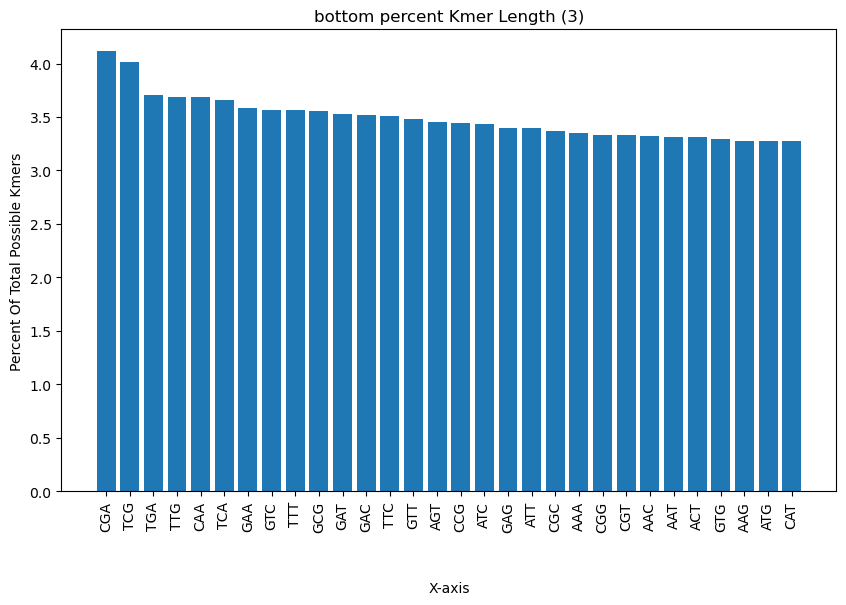

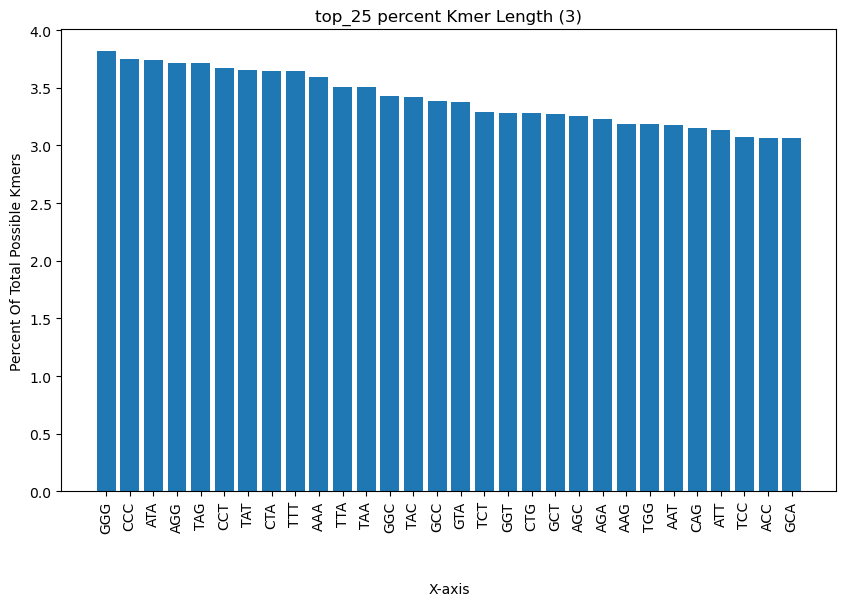

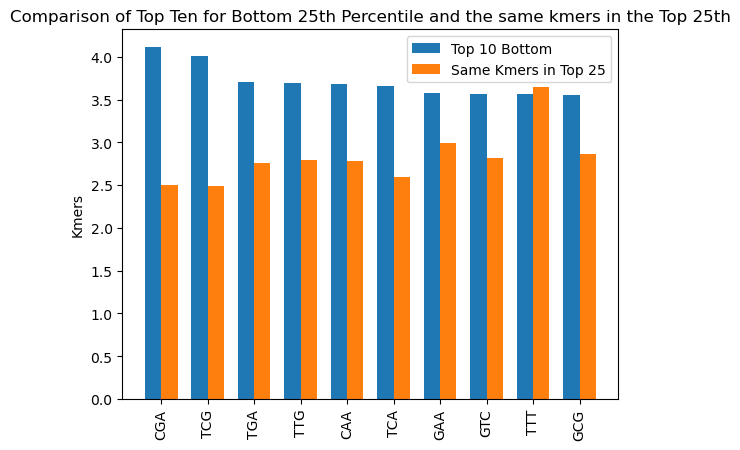

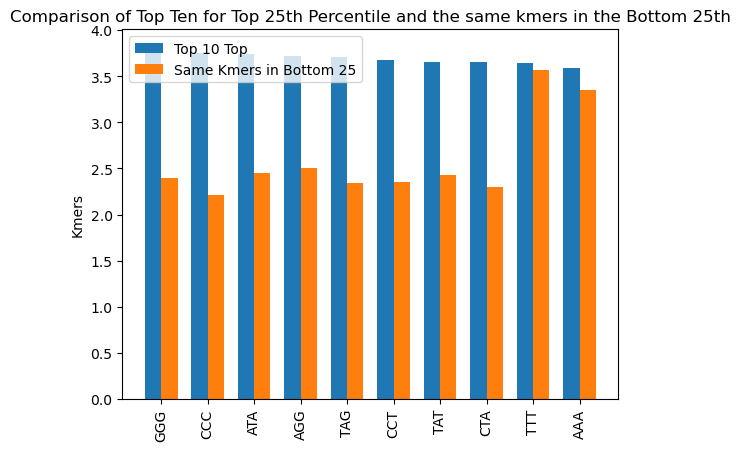

Top Ten Ratios (Bottom 25)
Kmer: GGG, percent_instances: 3.81521274321146
Kmer: CCC, percent_instances: 3.749732734658969
Kmer: ATA, percent_instances: 3.7417147744280523
Kmer: AGG, percent_instances: 3.714988240324995
Kmer: TAG, percent_instances: 3.710979260209536
Kmer: CCT, percent_instances: 3.6722257857601024
Kmer: TAT, percent_instances: 3.6548535385931156
Kmer: CTA, percent_instances: 3.649508231772504
Kmer: TTT, percent_instances: 3.642826598246739
Kmer: AAA, percent_instances: 3.5920461834509303

Top Ten Ratios (Top 25)
Kmer: CGA, percent_instances: 4.113213598460551
Kmer: TCG, percent_instances: 4.012989095574087
Kmer: TGA, percent_instances: 3.7083066067992303
Kmer: TTG, percent_instances: 3.6909343596322426
Kmer: CAA, percent_instances: 3.684252726106479
Kmer: TCA, percent_instances: 3.6588625187085735
Kmer: GAA, percent_instances: 3.581355569809707
Kmer: GTC, percent_instances: 3.566655976053026
Kmer: TTT, percent_instances: 3.562646995937567
Kmer: GCG, percent_instances: 

In [33]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 3)

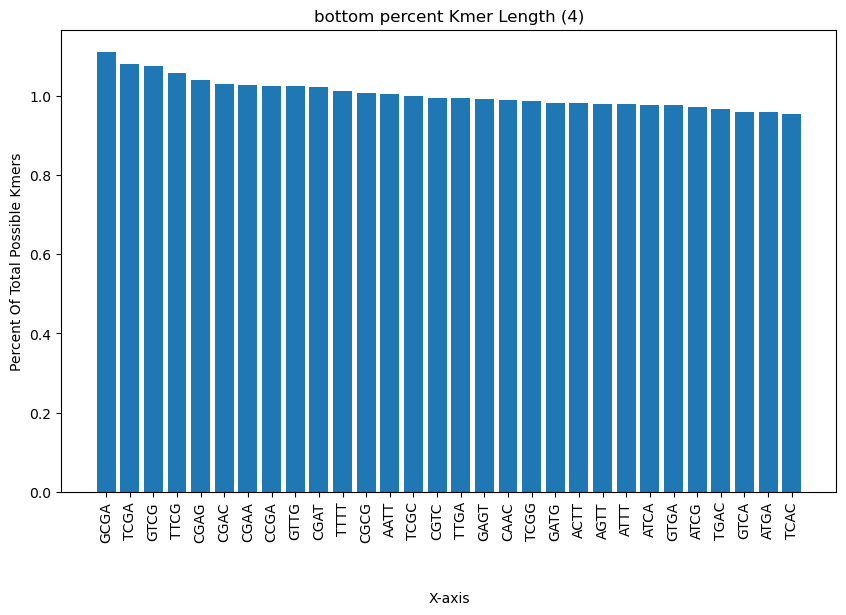

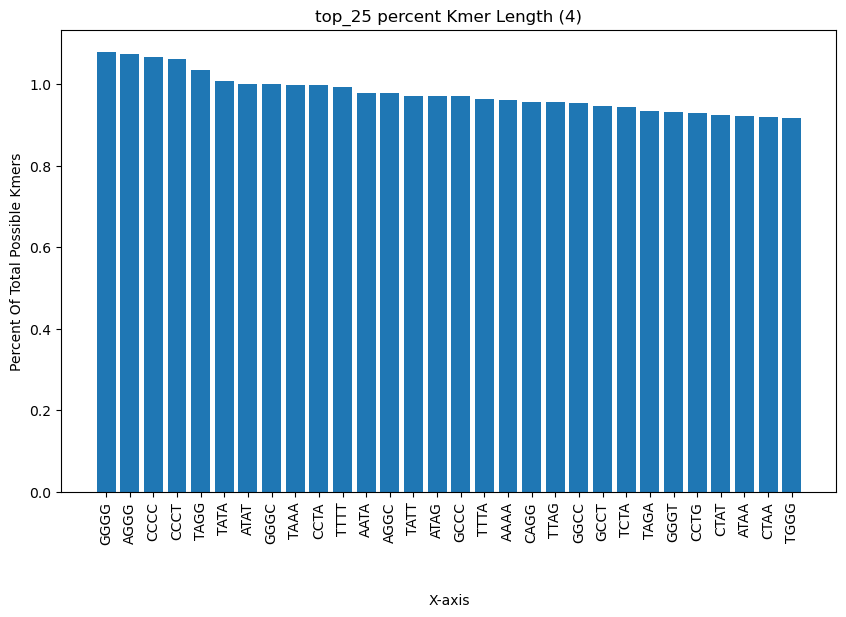

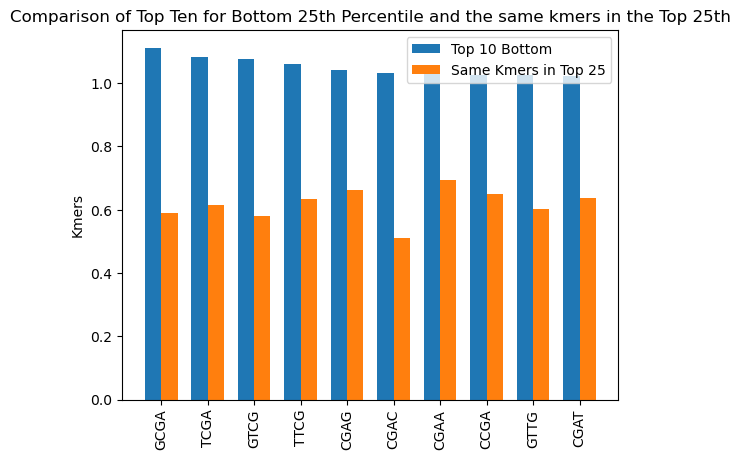

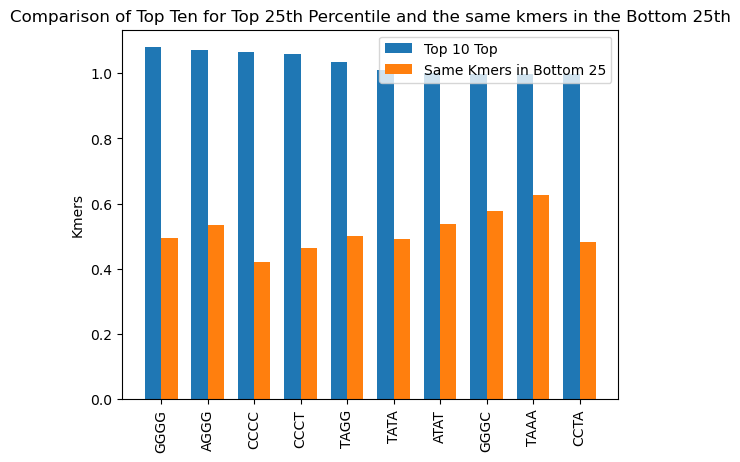

Top Ten Ratios (Bottom 25)
Kmer: GGGG, percent_instances: 1.0795245178988169
Kmer: AGGG, percent_instances: 1.0727007219576106
Kmer: CCCC, percent_instances: 1.0658769260164043
Kmer: CCCT, percent_instances: 1.0604178892634395
Kmer: TAGG, percent_instances: 1.034487464686856
Kmer: TATA, percent_instances: 1.0085570401102726
Kmer: ATAT, percent_instances: 1.0003684849808252
Kmer: GGGC, percent_instances: 0.9990037257925839
Kmer: TAAA, percent_instances: 0.9976389666043427
Kmer: CCTA, percent_instances: 0.9976389666043427

Top Ten Ratios (Top 25)
Kmer: GCGA, percent_instances: 1.1122787384166064
Kmer: TCGA, percent_instances: 1.080889277087058
Kmer: GTCG, percent_instances: 1.075430240334093
Kmer: TTCG, percent_instances: 1.0590531300751982
Kmer: CGAG, percent_instances: 1.039946501439821
Kmer: CGAC, percent_instances: 1.0303931871221323
Kmer: CGAA, percent_instances: 1.029028427933891
Kmer: CCGA, percent_instances: 1.0262989095574084
Kmer: GTTG, percent_instances: 1.0262989095574084
Kme

In [34]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 4)

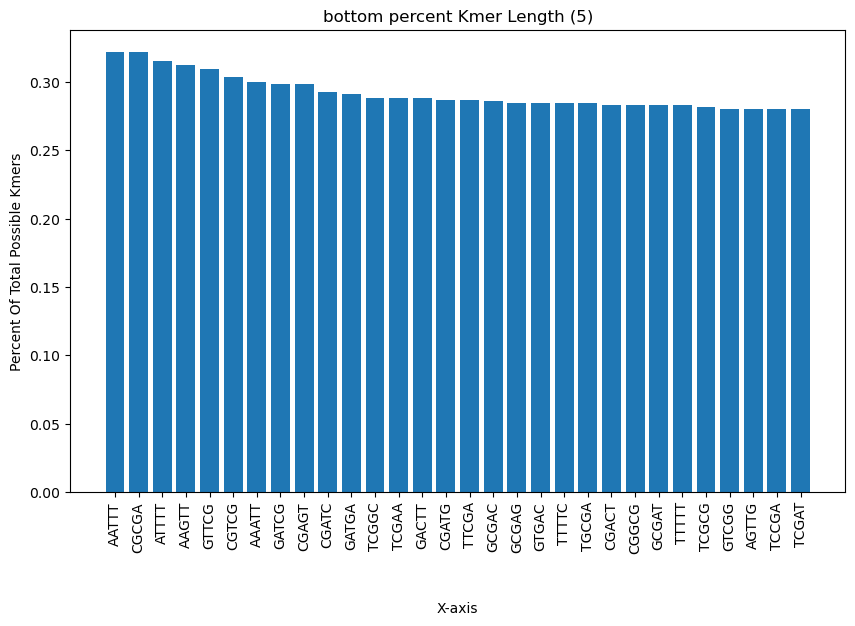

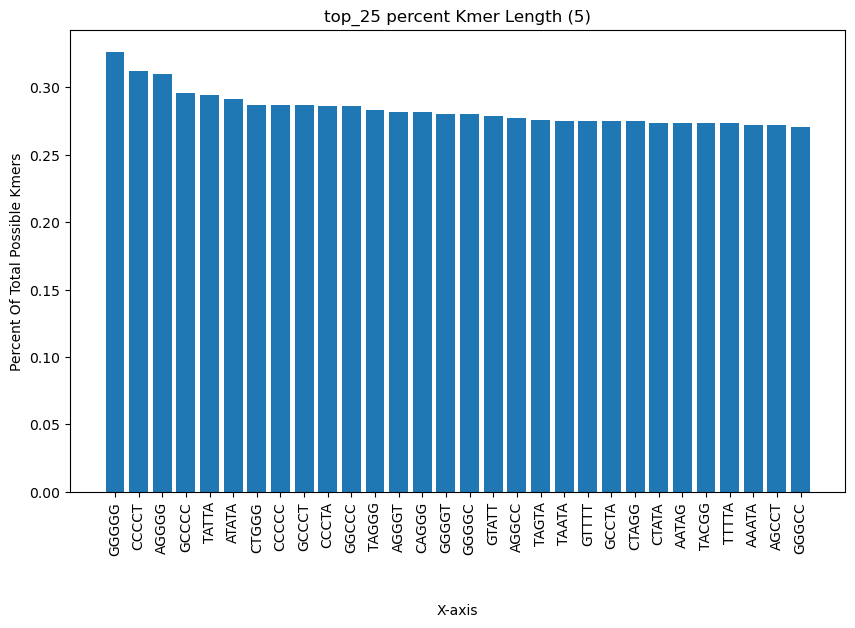

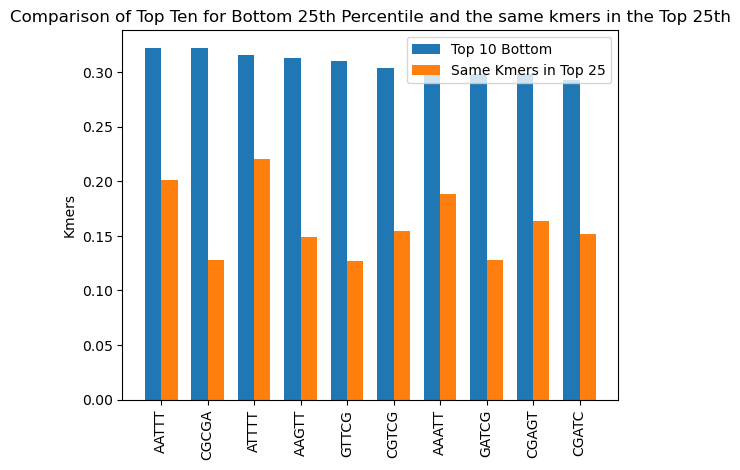

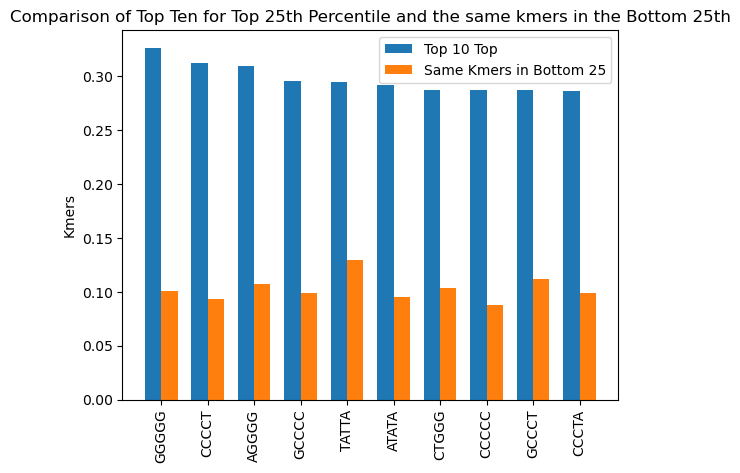

Top Ten Ratios (Bottom 25)
Kmer: GGGGG, percent_instances: 0.3262961207016761
Kmer: CCCCT, percent_instances: 0.3123518420392113
Kmer: AGGGG, percent_instances: 0.30956298630671836
Kmer: GCCCC, percent_instances: 0.2956187076442536
Kmer: TATTA, percent_instances: 0.2942242797780071
Kmer: ATATA, percent_instances: 0.2914354240455141
Kmer: CTGGG, percent_instances: 0.2872521404467747
Kmer: CCCCC, percent_instances: 0.2872521404467747
Kmer: GCCCT, percent_instances: 0.2872521404467747
Kmer: CCCTA, percent_instances: 0.2858577125805282

Top Ten Ratios (Top 25)
Kmer: AATTT, percent_instances: 0.32211283710293664
Kmer: CGCGA, percent_instances: 0.32211283710293664
Kmer: ATTTT, percent_instances: 0.3151406977717043
Kmer: AAGTT, percent_instances: 0.3123518420392113
Kmer: GTTCG, percent_instances: 0.30956298630671836
Kmer: CGTCG, percent_instances: 0.30398527484173243
Kmer: AAATT, percent_instances: 0.299801991242993
Kmer: GATCG, percent_instances: 0.2984075633767465
Kmer: CGAGT, percent_insta

In [35]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt",5)

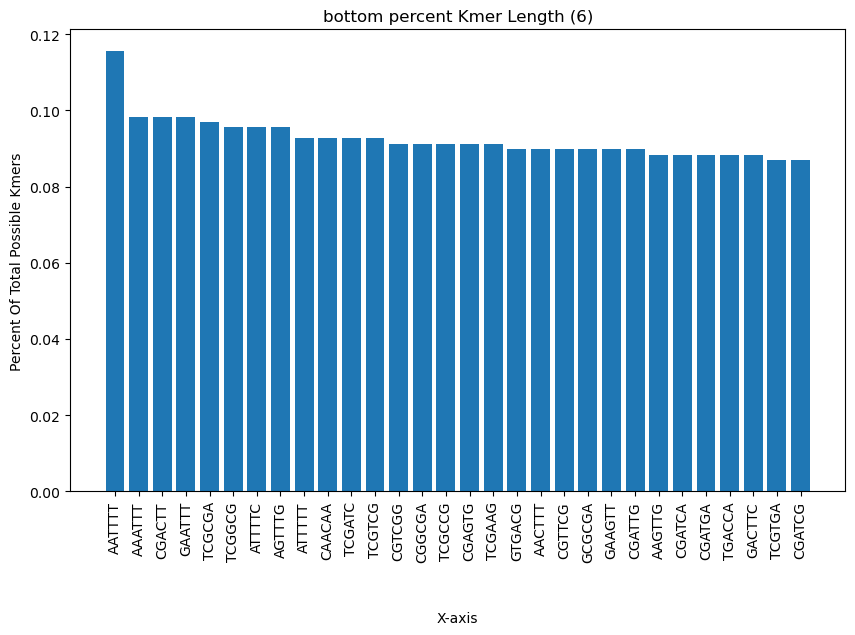

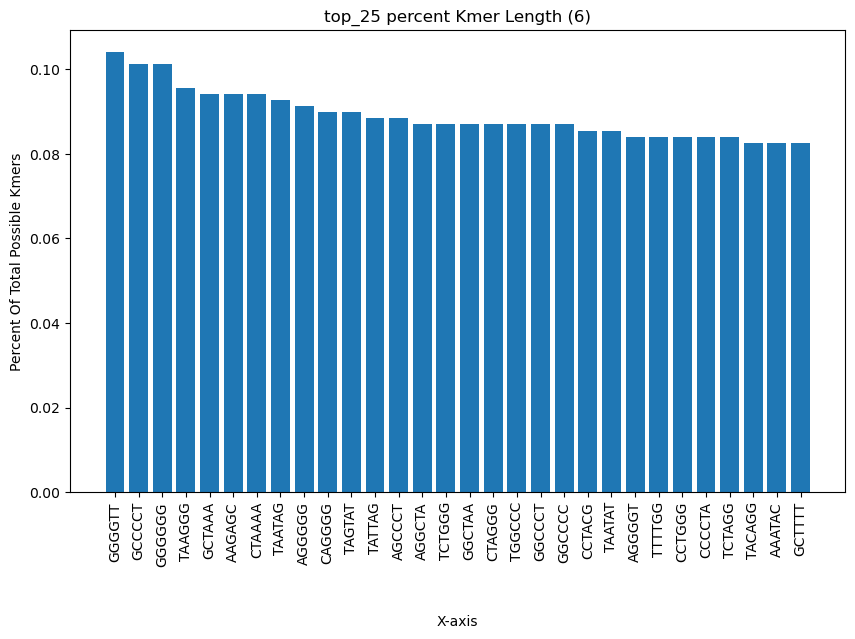

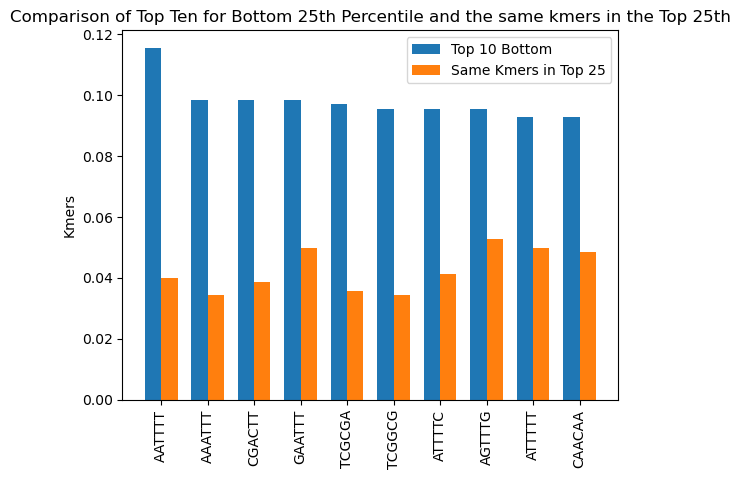

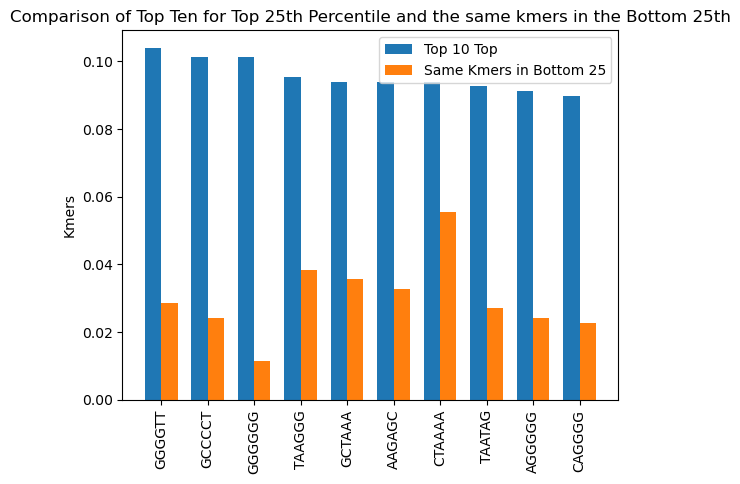

Top Ten Ratios (Bottom 25)
Kmer: GGGGTT, percent_instances: 0.10405530610790392
Kmer: GCCCCT, percent_instances: 0.10120447580357779
Kmer: GGGGGG, percent_instances: 0.10120447580357779
Kmer: TAAGGG, percent_instances: 0.09550281519492551
Kmer: GCTAAA, percent_instances: 0.09407740004276245
Kmer: AAGAGC, percent_instances: 0.09407740004276245
Kmer: CTAAAA, percent_instances: 0.09407740004276245
Kmer: TAATAG, percent_instances: 0.09265198489059939
Kmer: AGGGGG, percent_instances: 0.09122656973843632
Kmer: CAGGGG, percent_instances: 0.08980115458627325

Top Ten Ratios (Top 25)
Kmer: AATTTT, percent_instances: 0.11545862732520845
Kmer: AAATTT, percent_instances: 0.09835364549925167
Kmer: CGACTT, percent_instances: 0.09835364549925167
Kmer: GAATTT, percent_instances: 0.09835364549925167
Kmer: TCGCGA, percent_instances: 0.0969282303470886
Kmer: TCGGCG, percent_instances: 0.09550281519492551
Kmer: ATTTTC, percent_instances: 0.09550281519492551
Kmer: AGTTTG, percent_instances: 0.0955028151949

In [36]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 6)

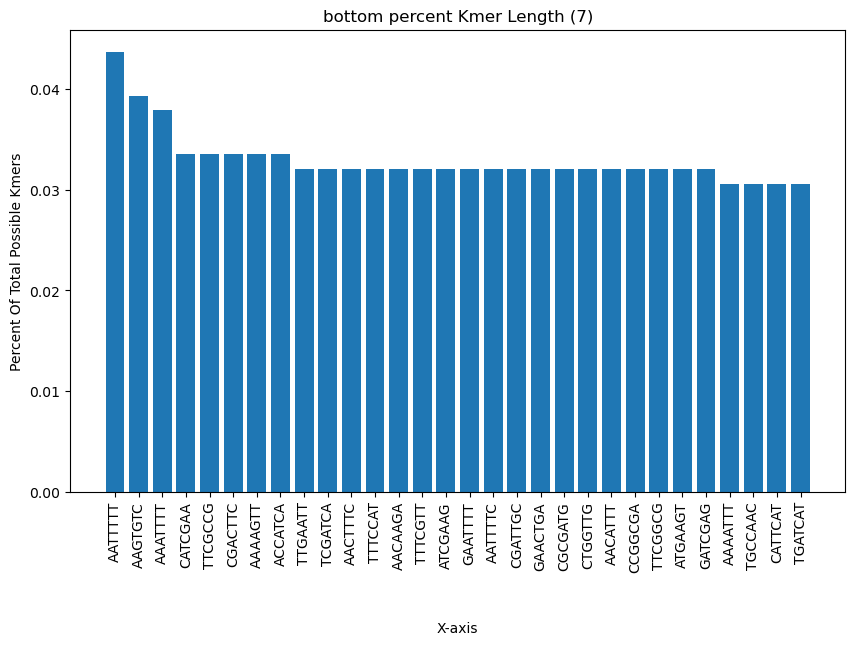

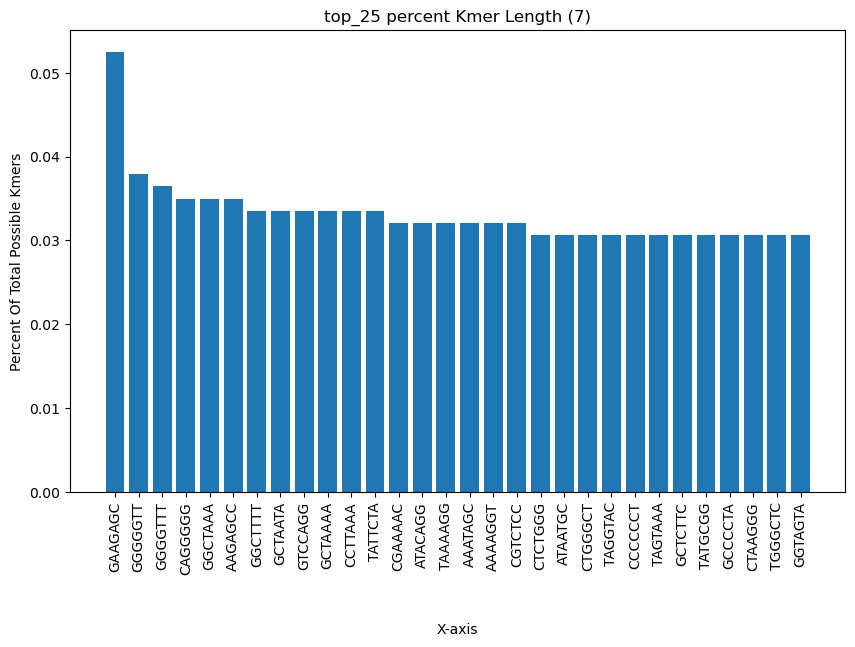

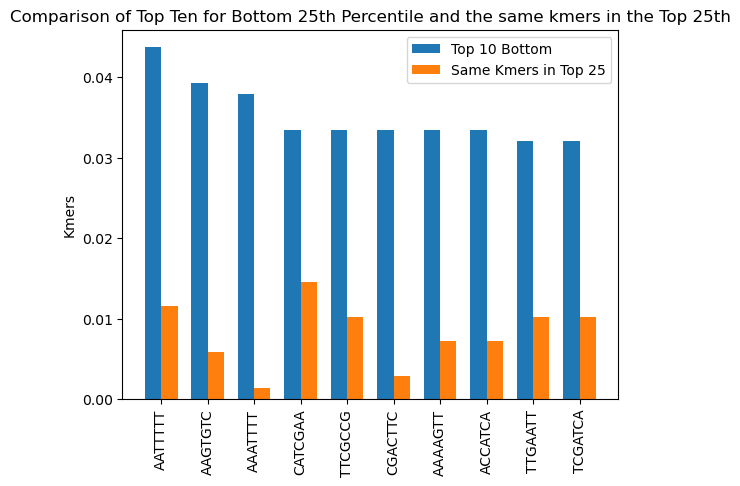

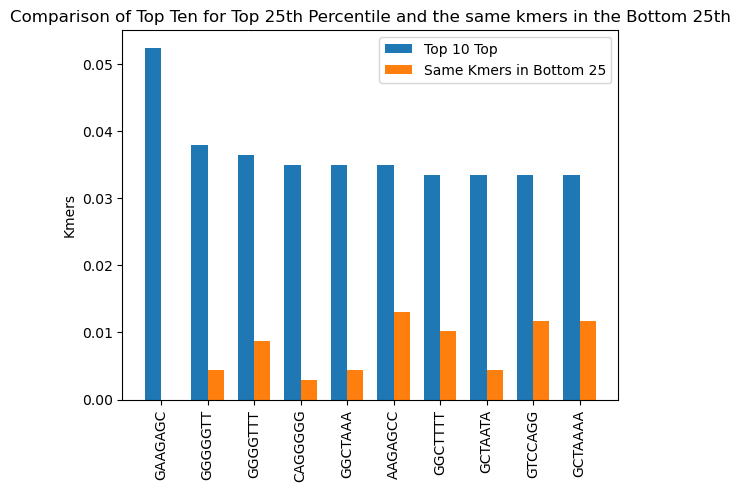

Top Ten Ratios (Bottom 25)
Kmer: GAAGAGC, percent_instances: 0.05248119423873112
Kmer: GGGGGTT, percent_instances: 0.03790308472797248
Kmer: GGGGTTT, percent_instances: 0.03644527377689661
Kmer: CAGGGGG, percent_instances: 0.03498746282582075
Kmer: GGCTAAA, percent_instances: 0.03498746282582075
Kmer: AAGAGCC, percent_instances: 0.03498746282582075
Kmer: GGCTTTT, percent_instances: 0.03352965187474488
Kmer: GCTAATA, percent_instances: 0.03352965187474488
Kmer: GTCCAGG, percent_instances: 0.03352965187474488
Kmer: GCTAAAA, percent_instances: 0.03352965187474488

Top Ten Ratios (Top 25)
Kmer: AATTTTT, percent_instances: 0.043734328532275935
Kmer: AAGTGTC, percent_instances: 0.039360895679048345
Kmer: AAATTTT, percent_instances: 0.03790308472797248
Kmer: CATCGAA, percent_instances: 0.03352965187474488
Kmer: TTCGCCG, percent_instances: 0.03352965187474488
Kmer: CGACTTC, percent_instances: 0.03352965187474488
Kmer: AAAAGTT, percent_instances: 0.03352965187474488
Kmer: ACCATCA, percent_insta

In [37]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 7)

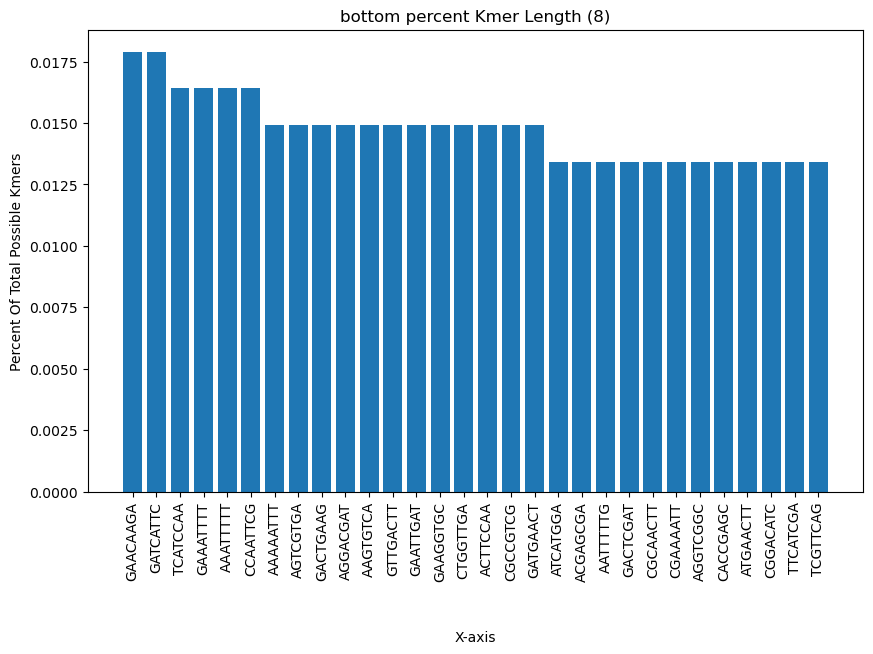

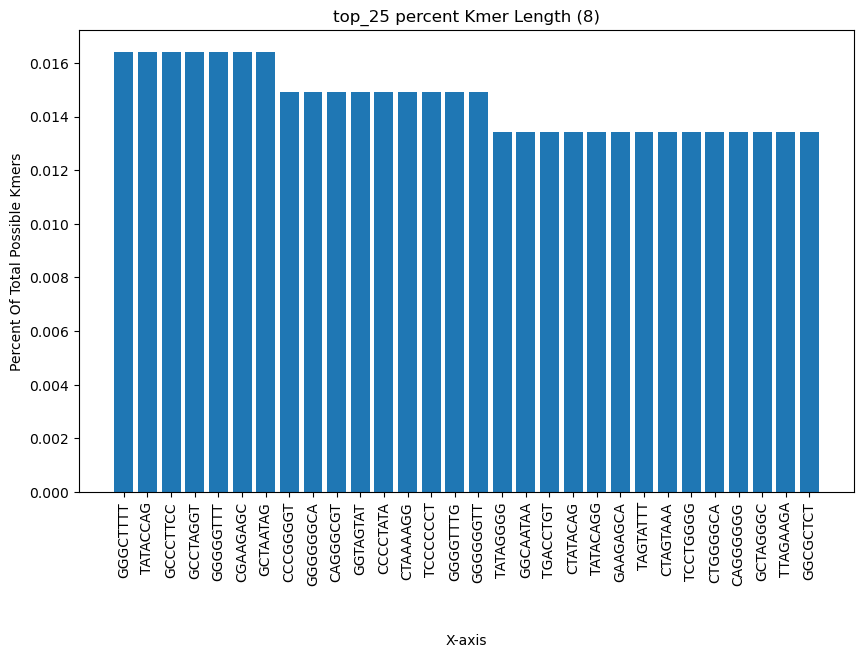

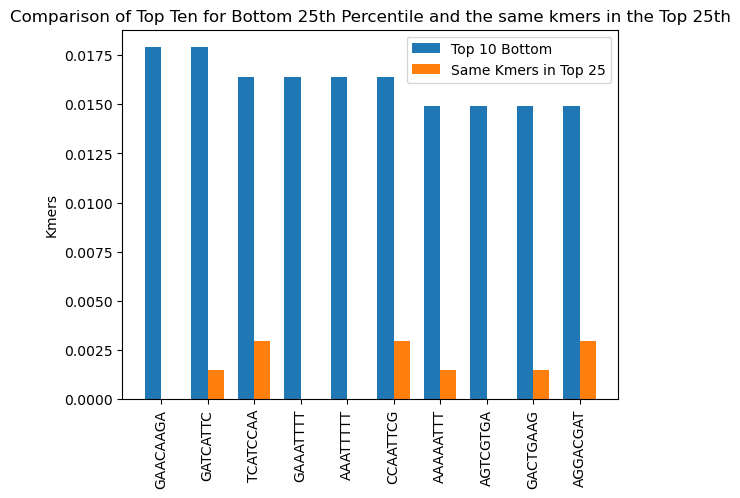

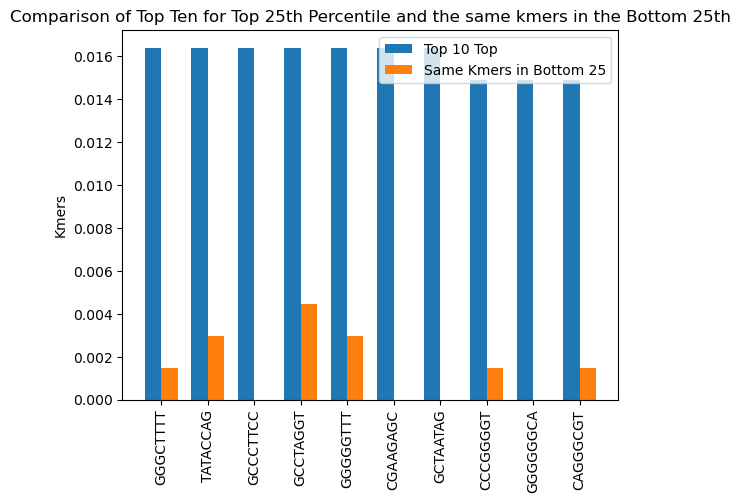

Top Ten Ratios (Bottom 25)
Kmer: GGGCTTTT, percent_instances: 0.01640884884466787
Kmer: TATACCAG, percent_instances: 0.01640884884466787
Kmer: GCCCTTCC, percent_instances: 0.01640884884466787
Kmer: GCCTAGGT, percent_instances: 0.01640884884466787
Kmer: GGGGGTTT, percent_instances: 0.01640884884466787
Kmer: CGAAGAGC, percent_instances: 0.01640884884466787
Kmer: GCTAATAG, percent_instances: 0.01640884884466787
Kmer: CCCGGGGT, percent_instances: 0.014917135313334426
Kmer: GGGGGGCA, percent_instances: 0.014917135313334426
Kmer: CAGGGCGT, percent_instances: 0.014917135313334426

Top Ten Ratios (Top 25)
Kmer: GAACAAGA, percent_instances: 0.017900562376001315
Kmer: GATCATTC, percent_instances: 0.017900562376001315
Kmer: TCATCCAA, percent_instances: 0.01640884884466787
Kmer: GAAATTTT, percent_instances: 0.01640884884466787
Kmer: AAATTTTT, percent_instances: 0.01640884884466787
Kmer: CCAATTCG, percent_instances: 0.01640884884466787
Kmer: AAAAATTT, percent_instances: 0.014917135313334426
Kmer: A

In [38]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 8)

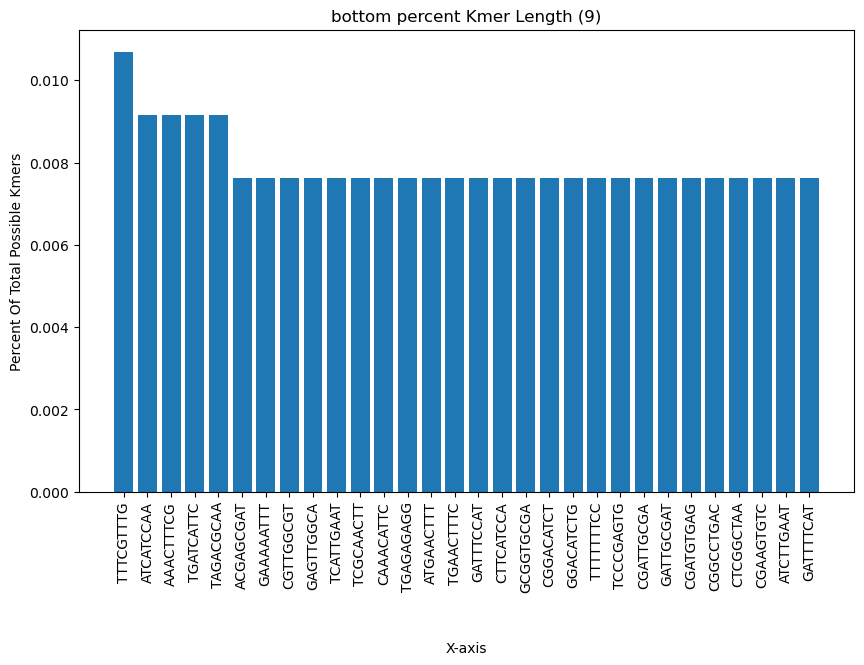

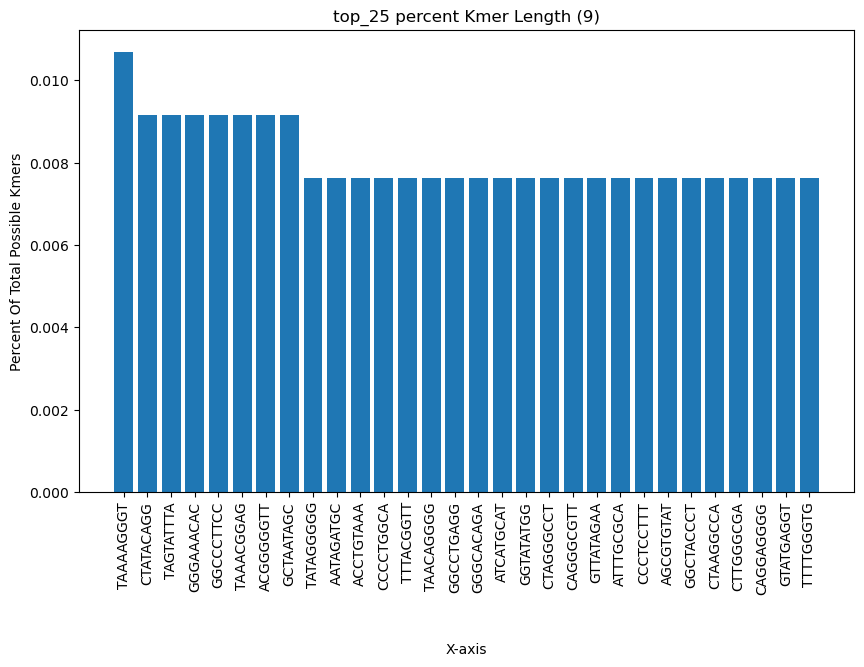

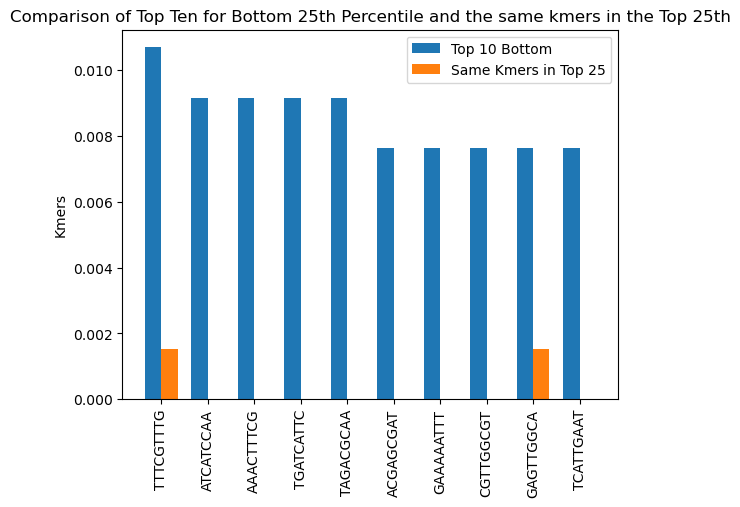

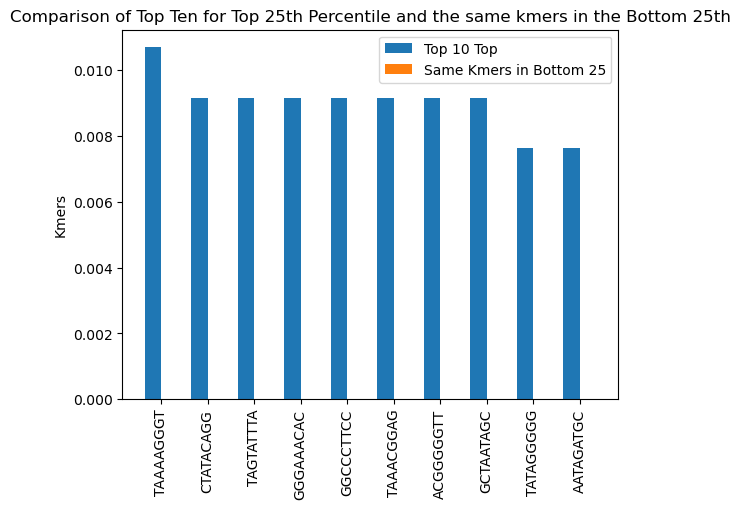

Top Ten Ratios (Bottom 25)
Kmer: TAAAAGGGT, percent_instances: 0.010690613641223005
Kmer: CTATACAGG, percent_instances: 0.009163383121048292
Kmer: TAGTATTTA, percent_instances: 0.009163383121048292
Kmer: GGGAAACAC, percent_instances: 0.009163383121048292
Kmer: GGCCCTTCC, percent_instances: 0.009163383121048292
Kmer: TAAACGGAG, percent_instances: 0.009163383121048292
Kmer: ACGGGGGTT, percent_instances: 0.009163383121048292
Kmer: GCTAATAGC, percent_instances: 0.009163383121048292
Kmer: TATAGGGGG, percent_instances: 0.007636152600873577
Kmer: AATAGATGC, percent_instances: 0.007636152600873577

Top Ten Ratios (Top 25)
Kmer: TTTCGTTTG, percent_instances: 0.010690613641223005
Kmer: ATCATCCAA, percent_instances: 0.009163383121048292
Kmer: AAACTTTCG, percent_instances: 0.009163383121048292
Kmer: TGATCATTC, percent_instances: 0.009163383121048292
Kmer: TAGACGCAA, percent_instances: 0.009163383121048292
Kmer: ACGAGCGAT, percent_instances: 0.007636152600873577
Kmer: GAAAAATTT, percent_instances: 

In [40]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 9)

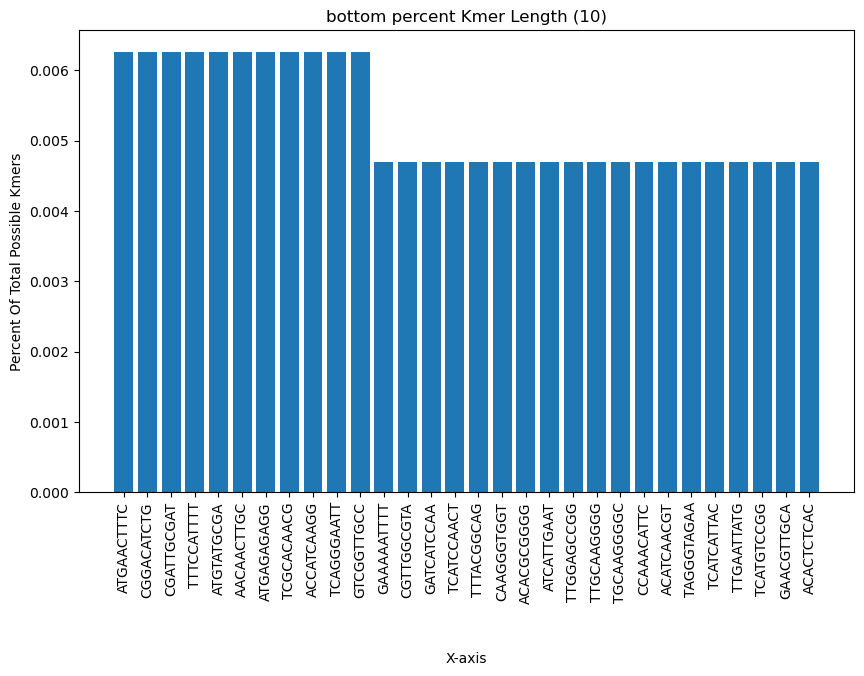

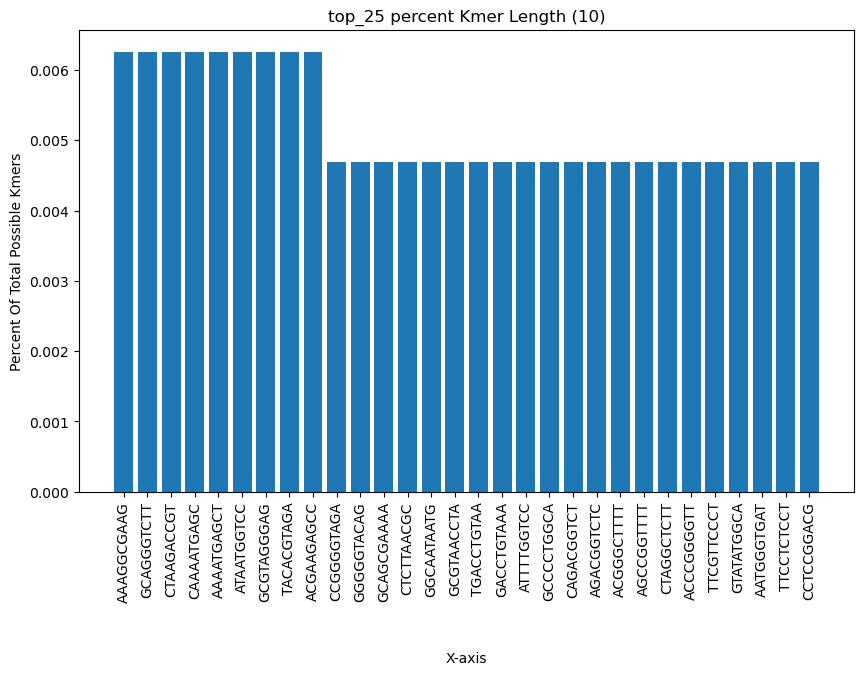

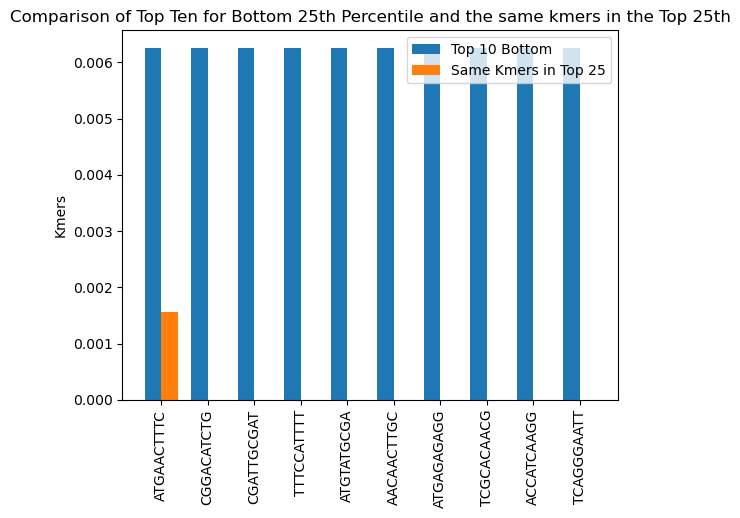

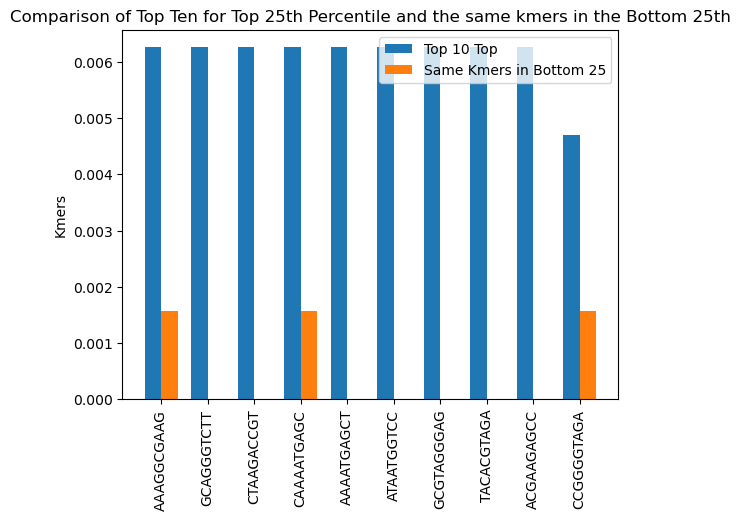

Top Ten Ratios (Bottom 25)
Kmer: AAAGGCGAAG, percent_instances: 0.006257920180228101
Kmer: GCAGGGTCTT, percent_instances: 0.006257920180228101
Kmer: CTAAGACCGT, percent_instances: 0.006257920180228101
Kmer: CAAAATGAGC, percent_instances: 0.006257920180228101
Kmer: AAAATGAGCT, percent_instances: 0.006257920180228101
Kmer: ATAATGGTCC, percent_instances: 0.006257920180228101
Kmer: GCGTAGGGAG, percent_instances: 0.006257920180228101
Kmer: TACACGTAGA, percent_instances: 0.006257920180228101
Kmer: ACGAAGAGCC, percent_instances: 0.006257920180228101
Kmer: CCGGGGTAGA, percent_instances: 0.004693440135171076

Top Ten Ratios (Top 25)
Kmer: ATGAACTTTC, percent_instances: 0.006257920180228101
Kmer: CGGACATCTG, percent_instances: 0.006257920180228101
Kmer: CGATTGCGAT, percent_instances: 0.006257920180228101
Kmer: TTTCCATTTT, percent_instances: 0.006257920180228101
Kmer: ATGTATGCGA, percent_instances: 0.006257920180228101
Kmer: AACAACTTGC, percent_instances: 0.006257920180228101
Kmer: ATGAGAGAGG, pe

In [41]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",
                         r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 10)